In [1]:
pwd

'C:\\Users\\raven\\F1Results DB (coursework)'

In [2]:
import pandas as pd 

In [3]:
import sqlite3

In [4]:
import F1DB 

In [5]:
import QueryF1DB 

In [6]:
import VisQueryF1DB 

In [7]:
#Import all functions from F1DB 
from F1DB  import *
# Provide the location of the database and its sample name
path= "C:/Users/raven/F1Results DB (coursework)"
database_name="F1DB"
#Create the F1DB using the function, create_Sqlite_connection under "/Users/user/DBModule"
connection=create_Sqlite_connection(path, database_name)

C:/Users/raven/F1Results DB (coursework)F1DB
Database created.
Changes saved.


In [8]:
import pandas as pd

In [9]:
path = "C:/Users/raven/Downloads/f1db_csv_21/"

In [10]:
fname1 = "circuits.csv"
fname2 = "constructors.csv"
fname3 = "drivers.csv"
fname4 = "lap_times.csv"
fname5 = "pit_stops.csv"
fname6 = "races.csv"
fname7 = "results.csv"

# Read the csv using the function, readcsv
data1 = readcsv(path, fname1)
data2 = readcsv(path, fname2)
data3 = readcsv(path, fname3)
data4 = readcsv(path, fname4)
data5 = readcsv(path, fname5)
data6 = readcsv(path, fname6)
data7 = readcsv(path, fname7)


# table uow  is created under movedb database space and populated with data from dataframe df using thefunction

# writecsv_to_db

tablename1="circuits" 
table_name1=writecsv_to_db(data1, tablename1)

tablename2="constructors" 
table_name2=writecsv_to_db(data2, tablename2)

tablename3="drivers"
table_name3=writecsv_to_db(data3, tablename3)

tablename4="lap_times" 
table_name4=writecsv_to_db(data4, tablename4)

tablename5="pit_stops" 
table_name5=writecsv_to_db(data5, tablename5)

tablename6="races" 
table_name6=writecsv_to_db(data6, tablename6)

tablename7="results"
table_name7=writecsv_to_db(data7, tablename7)


C:/Users/raven/Downloads/f1db_csv_21/circuits.csv
C:/Users/raven/Downloads/f1db_csv_21/constructors.csv
C:/Users/raven/Downloads/f1db_csv_21/drivers.csv
C:/Users/raven/Downloads/f1db_csv_21/lap_times.csv
C:/Users/raven/Downloads/f1db_csv_21/pit_stops.csv
C:/Users/raven/Downloads/f1db_csv_21/races.csv
C:/Users/raven/Downloads/f1db_csv_21/results.csv
circuits
constructors
drivers
lap_times
pit_stops
races
results


In [11]:
#Import all functions from VisQueryF1DB
from VisQueryF1DB import *
from QueryF1DB import *

In [12]:
# Visualization 1
# How many circuits are available per Country?

query1 = "select country,count(*) as total from circuits group by country having total >1"

# Assuming 'connection' is your database connection object
Visualization1_df = displaydbtable(query1, connection)

# Display the first few rows of the DataFrame
Visualization1_df

select country,count(*) as total from circuits group by country having total >1


,country,total
0,Australia,2
1,Austria,3
2,Belgium,3
3,Brazil,2
4,Canada,3
5,France,7
6,Germany,3
7,Italy,4
8,Japan,3
9,Portugal,4


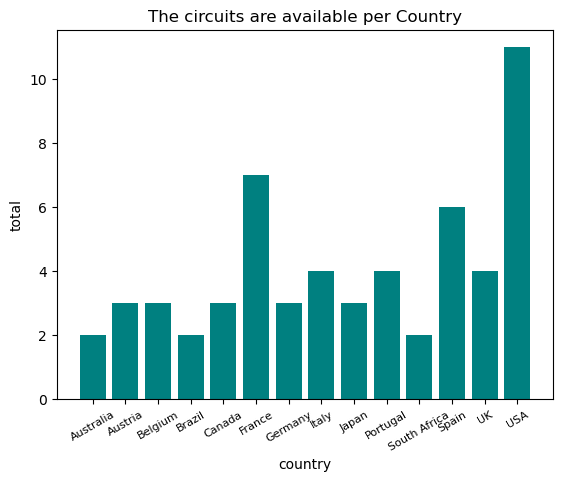

In [13]:
# Visualization 1
# How many circuits are available per Country?
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

value1=Visualization1_df['country'].tolist() 
value2=Visualization1_df['total'].tolist()
plt.title('The circuits are available per Country')
plt.xlabel('country')
plt.ylabel('total')
displaybar(value1,value2,color='teal')

plt.show()

In [15]:
#Visualization 2
#What is the number of races per season?

query2="SELECT year, count(*) as total FROM races group by year  Having year > 2009 "

# Assuming 'connection' is your database connection object
Visualization2_df = displaydbtable(query2, connection)

# Display the first few rows of the DataFrame
Visualization2_df

SELECT year, count(*) as total FROM races group by year  Having year > 2009 


,year,total
0,2010,19
1,2011,19
2,2012,20
3,2013,19
4,2014,19
5,2015,19
6,2016,21
7,2017,20
8,2018,21
9,2019,21


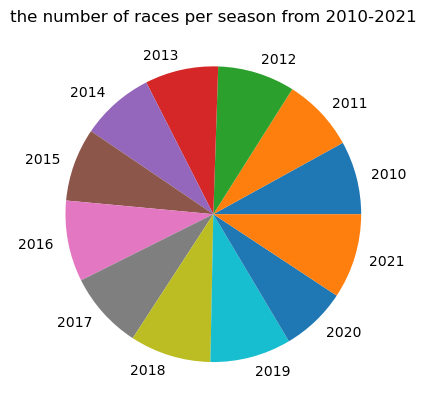

<function matplotlib.pyplot.show(close=None, block=None)>

In [16]:
#Visualization 2
#What is the number of races per season?

import matplotlib.pyplot as plt

list1 = Visualization2_df['total'].tolist()
list2 = Visualization2_df['year'].tolist()
plt.title('the number of races per season from 2010-2021')
displaypie(list1, list2)
plt.show

In [17]:
# Visualization 3
# What is the number of constructors per nationality?

query3 = '''SELECT nationality, count(*) as total FROM constructors GROUP BY nationality HAVING count(*) > 2'''

# Assuming 'connection' is your database connection object
Visualization3_df = displaydbtable(query3, connection)

# Display the first few rows of the DataFrame
Visualization3_df

SELECT nationality, count(*) as total FROM constructors GROUP BY nationality HAVING count(*) > 2


,nationality,total
0,American,39
1,British,86
2,Dutch,3
3,French,13
4,German,10
5,Italian,29
6,Japanese,5
7,South African,3
8,Swiss,5


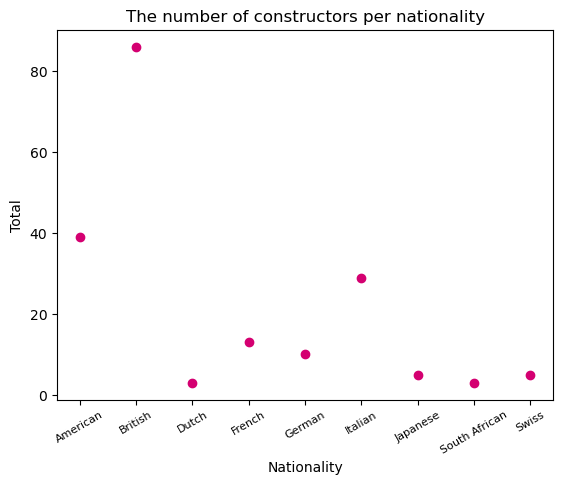

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col1 = Visualization3_df['nationality']
col2 = Visualization3_df['total']
plt.title('The number of constructors per nationality')
plt.xlabel("Nationality")
plt.ylabel("Total")
displayscatter(col1, col2, color='#D40071')
plt.show()

In [19]:
#Visualization 4,1
#How many points has each constructor scored?

query4_a='''SELECT constructorId, sum(points) as total_points_scored from results 
group by constructorId having sum(points)>400'''

# Assuming 'connection' is your database connection object
Visualization4a_df = displaydbtable(query4_a, connection)

# Display the first few rows of the DataFrame
Visualization4a_df

SELECT constructorId, sum(points) as total_points_scored from results 
group by constructorId having sum(points)>400


,constructorId,total_points_scored
0,1,5981.50
1,3,3590.00
2,4,1777.00
3,5,500.00
4,6,9590.27
5,9,5585.00
6,10,1098.00
7,15,557.00
8,22,861.50
9,25,711.00


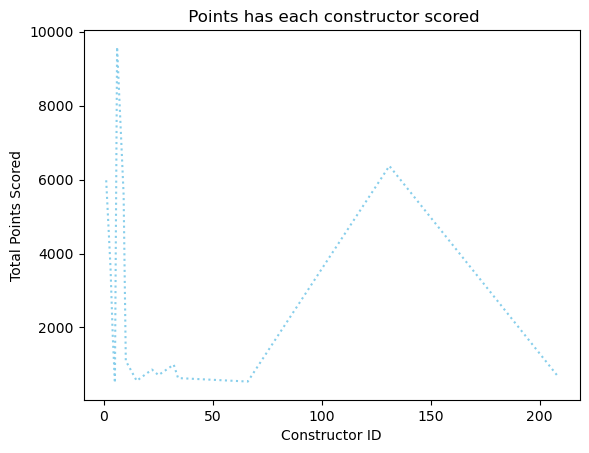

In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
les1 = Visualization4a_df['constructorId']  
les2= Visualization4a_df['total_points_scored']
plt.title(' Points has each constructor scored')
plt.xlabel('Constructor ID')
plt.ylabel('Total Points Scored')
displayline(les1, les2, color='skyblue')
plt.show() 

In [21]:
#Visualization 4,b
#In how many races does each constructor participates?

query4_b = '''SELECT constructorId, count(raceId) as no_of_races FROM results 
GROUP BY constructorId HAVING count(raceId) > 555'''

# Assuming 'connection' is your database connection object
Visualization4b_df = displaydbtable(query4_b, connection)

# Display the first few rows of the DataFrame
Visualization4b_df

SELECT constructorId, count(raceId) as no_of_races FROM results 
GROUP BY constructorId HAVING count(raceId) > 555


,constructorId,no_of_races
0,1,1783
1,3,1537
2,4,787
3,6,2299
4,9,648
5,15,789
6,18,672
7,21,590
8,25,881
9,27,611


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

col1=Visualization4b_df['no_of_races']
plt.title('Histogram of Number of Races Each Constructor Participates In')
plt.xlabel('Number of Races')
plt.ylabel('constructorId')

displayshistogram(col1, bins=3,color='#9D8EFF',edgecolor='magenta')
plt.show()

In [ ]:
#Visualization 5
#What is the trend of fastest lap times over the years per circuit?
#Please consider a reasonable number of circuits only

query5 = '''SELECT year, circuitId as "circuitId (Abu Dhabi Grand Prix)", name, fastestLapTime
      FROM results 
      INNER JOIN races ON results.raceId =races.raceId 
      WHERE name= "Abu Dhabi Grand Prix"
      GROUP BY year
      ORDER BY fastestLapTime asc'''

# Assuming 'connection' is your database connection object
Visualization5_df = displaydbtable(query5, connection)

# Display the first few rows of the DataFrame
Visualization5_df

In [ ]:
#Visualization 5
#What is the trend of fastest lap times over the years per circuit?
#Please consider a reasonable number of circuits only

import matplotlib.pyplot as plt
import numpy as np

data1= Visualization5_df["year"] 
data2=Visualization5_df["fastestLapTime"] 
plt.xlabel("year")
plt.ylabel("fastestLapTime")
plt.title("The trend of fastest lap times over the years for Abu Dhabi Grand Prix circuit")
displaycharts(data1, data2,color='#A50000')
plt.show()